In this notebook, the following models are to be tested. They are:

1. Linear / Logistic
2. Naive Bayes
3. SVM
4. Random Forest
5. Neural network

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import math
import seaborn as sns
from six.moves import cPickle as pickle

%matplotlib inline

c:\users\ymlai\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Convert train data to one-hot-encoding

This is to build a data model easily fit into different machine learning model below:

In [2]:
train_ds_file = 'train_dataset.pickle'
train_lb_file = 'train_label.pickle'
test_ds_file = 'test_dataset.pickle'

with open(train_ds_file, 'rb') as f:
    train_dataset = pickle.load(f)
    
with open(train_lb_file, 'rb') as f:
    train_label = pickle.load(f)
    
with open(test_ds_file, 'rb') as f:
    test_dataset = pickle.load(f)

In [3]:
def transform_ds_to_input(dataset):
    columns = ["Pclass", "Embarked_enc", "Salutation_enc", "CabinArea_enc"]
    ds_onehot = dataset[["Pclass", "Sex_enc", "SibSp", "Parch", "Fare", "CabinArea_enc",\
                                       "Embarked_enc", "Salutation_enc", "FamilyMember"]]
    ds_onehot = pandas.get_dummies(ds_onehot, sparse=True, columns=columns)
    scaler = StandardScaler().fit(ds_onehot)
    ds_onehot_scaled = scaler.transform(ds_onehot) 
    return ds_onehot_scaled

full_dataset = pandas.concat([train_dataset, test_dataset])
full_dataset_onehot = transform_ds_to_input(full_dataset)
train_dataset_onehot= full_dataset_onehot[:len(train_dataset)]
test_dataset_onehot = full_dataset_onehot[len(train_dataset):]

## Model selection

In [4]:
seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(train_dataset_onehot, train_label, test_size=test_size, random_state=seed)

In [5]:
from sklearn.linear_model import LogisticRegression

def default_logistic(X_train, y_train, X_test):
    clf = LogisticRegression()      
    clf.fit(X_train, y_train)

    # make predictions for test data
    y_pred = clf.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    return predictions

In [6]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

def default_gauss_nb(X_train, y_train, X_test):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    y_pred = gnb.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    return predictions

def default_multinom_nb(X_train, y_train, X_test):
    gnb = MultinomialNB()
    gnb.fit(X_train, y_train)

    y_pred = gnb.predict(X_test)
    predictions = [round(value) for value in y_pred]

    return predictions

def default_bernoulli_nb(X_train, y_train, X_test):
    gnb = BernoulliNB()
    gnb.fit(X_train, y_train)

    y_pred = gnb.predict(X_test)
    predictions = [round(value) for value in y_pred]

    return predictions

In [7]:
# SVM
from sklearn.svm import SVC

def default_rbf_svm(X_train, y_train, X_test):
    clf = SVC()
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    return predictions

def default_linear_svm(X_train, y_train, X_test):
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    return predictions

def default_poly_svm(X_train, y_train, X_test):
    clf = SVC(kernel='poly')
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    return predictions

In [8]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

def default_rf(X_train, y_train, X_test):
    clf = RandomForestClassifier()      
    clf.fit(X_train, y_train)

    # make predictions for test data
    y_pred = clf.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    return predictions

def default_extra_tree(X_train, y_train, X_test):
    clf = ExtraTreesClassifier()      
    clf.fit(X_train, y_train)

    # make predictions for test data
    y_pred = clf.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    return predictions

In [9]:
# neural network
from sklearn.neural_network import MLPClassifier

def default_nn(X_train, y_train, X_test):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                         hidden_layer_sizes=(5, 2), random_state=1)
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    return predictions

In [10]:
# boosting 
from xgboost import XGBClassifier

def default_xgboost(X_train, y_train, X_test):
    clf = XGBClassifier()
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    return predictions

In [11]:
def calc_accuracy(y_test, predictions):
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

## Applying different models

In [12]:
## now run it for ten times
classifiers = {"Logistic" : default_logistic, 
               "Guassian Naive bayes" : default_gauss_nb, 
               #"Multinominal Naive bayes" : default_multinom_nb,
               "Bernoulli Naive bayes" : default_bernoulli_nb,
               "RBF SVM" : default_rbf_svm,
               "Linear SVM" : default_linear_svm,
               "Polynomial SVM" : default_poly_svm,
               "Random forest" : default_rf,
               "Extra tree" : default_extra_tree,
               "Neural Network" : default_nn,
               "XGboost": default_xgboost
              }


incorrect = pandas.DataFrame(columns=classifiers.keys())
## show in graph what mistake create error
for key, value in classifiers.items():
    prediction = value(X_train, y_train, X_test)
    accuracy = calc_accuracy(y_test, prediction)
    incorrect[key] = (y_test != prediction)
    
    print("%s Accuracy: %.2f%%" % (key, accuracy * 100.0))

Bernoulli Naive bayes Accuracy: 82.46%
Logistic Accuracy: 81.72%
Extra tree Accuracy: 79.85%
Guassian Naive bayes Accuracy: 60.45%
XGboost Accuracy: 83.58%
RBF SVM Accuracy: 82.84%
Polynomial SVM Accuracy: 83.96%
Random forest Accuracy: 81.34%
Linear SVM Accuracy: 81.34%
Neural Network Accuracy: 81.34%


In [13]:
#instance most classifed incorrectly
incorrect_sum = incorrect.sum(axis = 1)
incorrect_sum.sort_values(ascending=False)

for i in range(10, 0, -1):
    tmp = incorrect_sum >= i
    print("No of instances incorrectly classified by at least %d classifier: %d (accuracy rate: %f%%)" % \
          (i, tmp.sum(), (tmp.sum()/len(prediction)) * 100))

No of instances incorrectly classified by at least 10 classifier: 13 (accuracy rate: 4.850746%)
No of instances incorrectly classified by at least 9 classifier: 21 (accuracy rate: 7.835821%)
No of instances incorrectly classified by at least 8 classifier: 29 (accuracy rate: 10.820896%)
No of instances incorrectly classified by at least 7 classifier: 35 (accuracy rate: 13.059701%)
No of instances incorrectly classified by at least 6 classifier: 44 (accuracy rate: 16.417910%)
No of instances incorrectly classified by at least 5 classifier: 52 (accuracy rate: 19.402985%)
No of instances incorrectly classified by at least 4 classifier: 58 (accuracy rate: 21.641791%)
No of instances incorrectly classified by at least 3 classifier: 68 (accuracy rate: 25.373134%)
No of instances incorrectly classified by at least 2 classifier: 80 (accuracy rate: 29.850746%)
No of instances incorrectly classified by at least 1 classifier: 139 (accuracy rate: 51.865672%)


## Model analysis

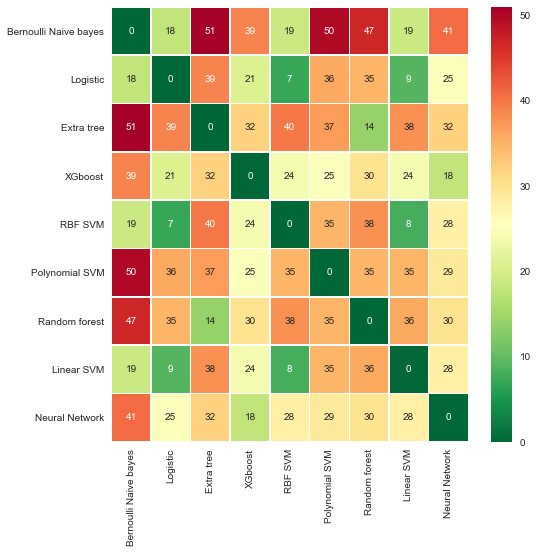

In [14]:
#remove 2 columns for low accuracy rate
incorrect_p = incorrect.drop('Guassian Naive bayes', 1)

incorrect_rel = pandas.DataFrame(index=incorrect_p.columns, columns=incorrect_p.columns)

for key1 in incorrect_p.columns:
    for key2 in incorrect_p.columns:
        tmp = incorrect_p[key1] != incorrect_p[key2]
        incorrect_rel[key1][key2] = tmp.sum()

incorrect_rel = incorrect_rel.astype(float)
fig = plt.figure(figsize=(8,8))
sns.heatmap(incorrect_rel, cmap='RdYlGn_r', linewidths=0.5, annot=True)

In [15]:
# In the following, we just try to use 3 top classifer to form a voting classifier
#Polynomial SVM Accuracy: 84.33%
#XGboost Accuracy: 83.58%
#RBF SVM Accuracy: 82.84%
#Bernoulli Naive bayes Accuracy: 82.09%
#Logistic Accuracy: 81.72%
#Neural Network Accuracy: 81.72%
#Random forest Accuracy: 81.34%
#Linear SVM Accuracy: 81.34%
#Extra tree Accuracy: 81.34%
#Guassian Naive bayes Accuracy: 60.45%

from sklearn.ensemble import VotingClassifier
clf1 = SVC(kernel='poly')
clf2 = XGBClassifier()
clf3 = SVC()
clf4 = BernoulliNB()
clf5 = LogisticRegression()
clf6 = RandomForestClassifier()

eclf1 = VotingClassifier(estimators=[('polysvc', clf1), ('xgb', clf2), ('rbf svm', clf3)], voting='hard')

eclf1.fit(X_train, y_train) 
y_pred = eclf1.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = calc_accuracy(y_test, predictions)
print("%s Accuracy: %.2f%%" % ("Voting(3) classifier", accuracy * 100.0))

eclf2 = VotingClassifier(estimators=[('polysvc', clf1), ('xgb', clf2), ('rbf svm', clf3), ('bnb', clf4), ('lr', clf5)], voting='hard')
eclf2.fit(X_train, y_train) 
y_pred = eclf2.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = calc_accuracy(y_test, predictions)
print("%s Accuracy: %.2f%%" % ("Voting(5) classifier", accuracy * 100.0))

Voting(3) classifier Accuracy: 83.21%
Voting(5) classifier Accuracy: 82.09%


## Error case analysis

## Outcome, what have we learnt?

In [17]:
# A sample submission of the best model

clf = SVC(kernel='poly')
clf.fit(X_train, y_train)

# make predictions for test data
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

r_pred = clf.predict(test_dataset_onehot)
r_predictions = [int(round(value)) for value in r_pred]

submission_df = pandas.DataFrame(index=test_dataset.index, columns=["Survived"])
submission_df["Survived"] = r_predictions
submission_df.to_csv("submission_poly.csv", sep=',')

Accuracy: 83.96%
